In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
def retrieve_param(folder_name: str):
    file_param = "Figures/" + folder_name + "/param.txt"
    # file_param = "/Volumes/Elements/Documents/2. Cambridge/3. MPhil/4. Python code/cell-migration/results/Figures/" + folder_name + "/param.txt"
    file = open(file_param, 'r')

    i = 0
    # Saving all the parameters in the good variable
    for line in file:
        if i == 2:
            h = float(line[3:])
        if i == 3:
            dim_x = float(line[7:])
        if i == 4:
            dim_y = float(line[7:])
        if i == 5:
            nx = int(line[4:])
        if i == 6:
            ny = int(line[4:])
        if i == 7:
            n = int(line[3:])
        if i == 8:
            dt = float(line[4:])
        if i == 9:
            theta = float(line[7:])
        if i == 10:
            Cahn = float(line[6:])
        if i == 11:
            Pe = float(line[4:])
        if i == 12:
            Ca = float(line[4:])
        if i == 13:
            starting_point = float(line[16:])
        if i == 14:
            h_0 = float(line[5:])
        if i == 15:
            k_wave = float(line[8:])
        if i == 16:
            sigma = float(line[7:])
        if i == 17:
            q = float(line[3:])
        if i==18:
            alpha = float(line[7:]) 
        i += 1
    file.close()
    return h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha

In [ ]:
def hist_sizes(file_name, n, dt):
    sizes_with_time = np.zeros(n)
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            size = np.asarray(row[1:], dtype = float)
            
            # if np.min(size)>100:
            #     bins=2
            # else:
            #     bins=3
            #     
            # col, lim = np.histogram(size, bins=bins)
            # 
            # # big vertex
            # size = np.sort(size)
            # big_size = size[-6:]
            # mean_big = np.mean(big_size)
            
            
            #medium vertex
            # min_med = lim[-3]
            # med_size = size[size <min_big]
            # med_size = med_size[med_size>=min_med]
            # mean_med = np.mean(med_size)
            # mean_med = 0
            
            # fig = plt.figure(figsize=(10,6))
            # plt.hist(size, bins=bins, lw=1)
            # plt.xlabel('Sizes (pixel)')
            # plt.ylabel('Count')
            # plt.title('Size distribution for t=' + str(inc))
            # plt.style.use('ggplot')
            # #plt.savefig('Distrib speed for test ' + folder_name)
            # plt.show()
            # plt.close(fig)
            
            sizes_with_time[int(inc)] =  np.sum(size)
    return sizes_with_time

In [ ]:
folder_name = '9-6-2020#1'
file_name = "Figures/" + folder_name + "/size_vortex.csv"

In [ ]:
list_test= ['13-5-2020#1','12-5-2020#2','13-5-2020#2', '12-5-2020#3', '13-5-2020#3', '12-5-2020#4', '13-5-2020#4', '10-6-2020#11', '10-6-2020#12', '10-6-2020#14', '10-6-2020#13', '3-6-2020#1', '26-5-2020#1',  '3-6-2020#2']

coef=[]
alphas=[]

fig, ax = plt.subplots(figsize=(10,6))


for folder_name in list_test:
    file_name = "Figures/" + folder_name + "/size_vortex.csv"
    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
    
    T = np.linspace(dt,n*dt, n)
    sizes_with_time = hist_sizes(file_name=file_name, n=n, dt=dt)
    
    z = np.polyfit(T[T<1.1], sizes_with_time[T<1.1], deg=1)
    p = np.poly1d(z)
    # print('Alpha= ' + str(alpha) + ' linear fit ' + str(p))
    alphas.append(alpha)
    coef.append(p[1])
    plt.plot(T[T<1.1], sizes_with_time[T<1.1]*(h**2)/(dim_x*dim_y), label=str(alpha))
    
plt.xlabel('Time')
plt.ylabel('Vortex area proportion')
plt.title('Vortex area through time for various alpha')
plt.style.use('bmh')
plt.legend()
plt.show()
plt.close(fig)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(alphas, coef)
plt.plot(np.ones(100), np.linspace(2000,7000, 100), ls=':')
plt.xlabel('Alpha')
plt.ylabel('Rate')
plt.title('"Growth rate" of the vortex for various alpha')
plt.style.use('bmh')
plt.show()
plt.close(fig)


In [ ]:
def angles(file_name, n, dt):
    angles_with_time = np.zeros((n,2))
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            mean_angle = np.asarray(row[1], dtype = float)
            std_angle = np.asarray(row[2], dtype = float)
            angles_with_time[int(inc)] = np.asarray([mean_angle, std_angle]) 
    return angles_with_time

In [ ]:
list_test= ['13-5-2020#4', '10-6-2020#11', '10-6-2020#12', '10-6-2020#14', '10-6-2020#13', '3-6-2020#1']


fig, ax = plt.subplots(figsize=(10,6))

for folder_name in list_test:
    file_name = "Figures/" + folder_name + "/angles.csv"
    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
    T = np.linspace(dt,n*dt, n)
    angles_with_time = angles(file_name=file_name, n=n, dt=dt)
    plt.plot(T, angles_with_time[:,0], label=str(alpha))
plt.xlabel('Time')
plt.ylabel('Mean angle')
ax.set(ylim=(-0.1,0.1))
plt.title('Mean angle in active fluid for various alpha')
plt.style.use('seaborn')
plt.legend()
plt.show()
plt.close(fig)

stds=[]
alphas=[]
fig, ax = plt.subplots(figsize=(10,6))

for folder_name in list_test:
    file_name = "Figures/" + folder_name + "/angles.csv"
    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
    T = np.linspace(dt,n*dt, n)
    angles_with_time = angles(file_name=file_name, n=n, dt=dt)
    stds.append(np.mean(angles_with_time[T>0.8,1]))
    alphas.append(alpha)
    plt.plot(T, angles_with_time[:,1], label=str(alpha))
plt.xlabel('Time')
plt.ylabel('STD angle')
ax.set(ylim=(0,1.5))
plt.title('STD angle in active fluid for various alpha')
plt.style.use('seaborn')
plt.legend()
plt.show()
plt.close(fig)

# z = np.polyfit(alphas, stds, deg=1)
# p = np.poly1d(z)
# 
# fig, ax = plt.subplots(figsize=(10,6))
# plt.plot(alphas, stds)
# plt.plot(alphas, p(alphas))
# plt.xlabel('Alpha')
# plt.ylabel('Temporal average (T>0.8)  of the STD')
# plt.title('STD depending on alpha')
# plt.style.use('seaborn')
# plt.legend(['Simulations', 'Linear fit' + str(p)])
# plt.show()
# plt.close(fig)

In [ ]:
def angles_dist(file_name, n, dt):
    angles = np.zeros(1)
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            angle = np.asarray(row[1:], dtype = float)
            angles = np.append(angles, angle)
    return angles[1:]

In [ ]:
list_test= ['13-5-2020#1','12-5-2020#2','13-5-2020#2', '12-5-2020#3', '13-5-2020#3', '12-5-2020#4', '13-5-2020#4', '10-6-2020#11', '10-6-2020#12', '10-6-2020#14', '10-6-2020#13', '3-6-2020#1', '26-5-2020#1',  '3-6-2020#2']

var=[]
alphas=[]

fig, ax = plt.subplots(figsize=(10,6))
for folder_name in list_test:
    file_name = "Figures/" + folder_name + "/angles2.csv"
    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
    angles = angles_dist(file_name=file_name, n=n, dt=dt)
    var.append(np.var(angles))
    alphas.append(alpha)
    plt.hist(angles, label=str(alpha), bins=120, alpha=0.5)

plt.xlabel('Angles')
plt.ylabel('Count')
plt.title('Angle distridution for various alpha')
plt.style.use('bmh')
plt.legend()
plt.show()
plt.close(fig)
    

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(alphas, var)
plt.xlabel('Alpha')
plt.ylabel('Variance')
plt.style.use('bmh')
plt.show()
plt.close(fig)

In [3]:
def mean_norm_with_time(file_name, n, dt):
    norms = np.zeros((n,2))
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            curr_row = np.asarray(row[1:], dtype=float)
            mean_norm = np.mean(curr_row)
            var_norm = np.var(curr_row)
            norms[int(inc),:] = mean_norm, var_norm
    return norms

def distrib_norm(file_name, n, dt):
    norms = np.zeros(1)
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            norm = np.asarray(row[1:], dtype = float)
            norms = np.append(norms, norm)
    return norms[1:]

def area_backward_with_time(file_name, n, dt):
    ratio = np.zeros(n)
    
    with open(file_name, 'r') as file:
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            inc = float(row[0])
            time = int(inc*dt*10000)/10000
            rat = np.asarray(row[1:], dtype=float)
            ratio[int(inc)] = rat
    
    peaks, _  = find_peaks(ratio)
    peaks = peaks[peaks>3]
    peaks = peaks[ratio[peaks]>=0.005]
    
    return ratio, peaks
    

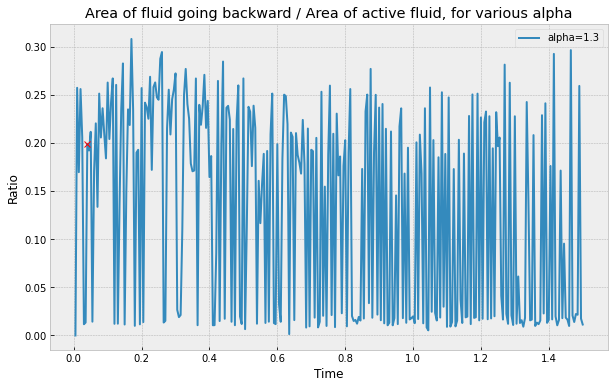

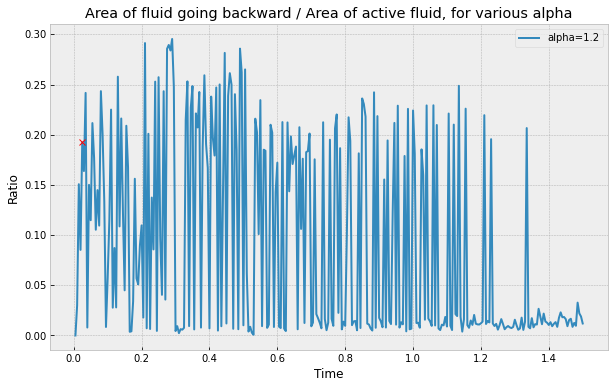

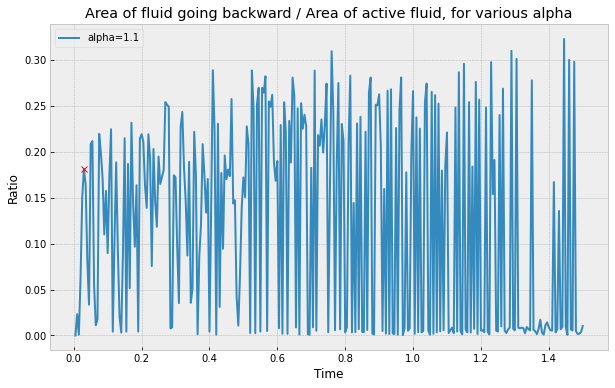

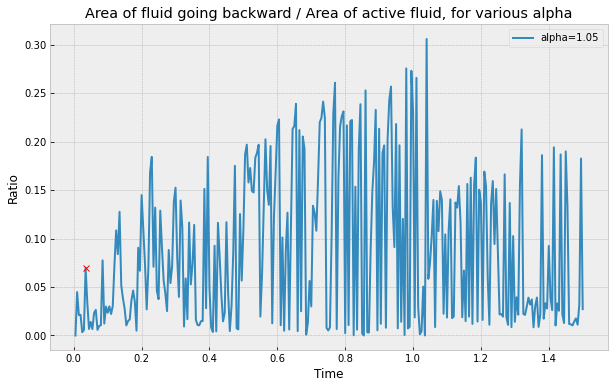

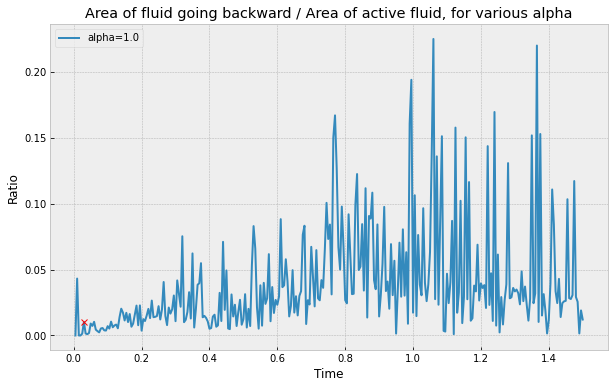

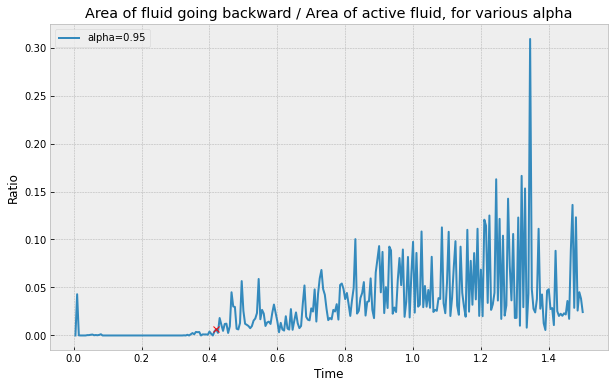

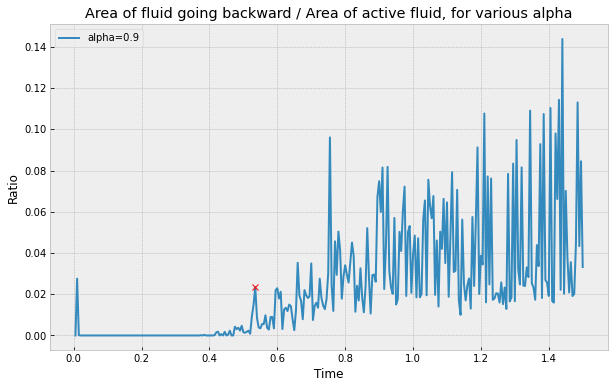

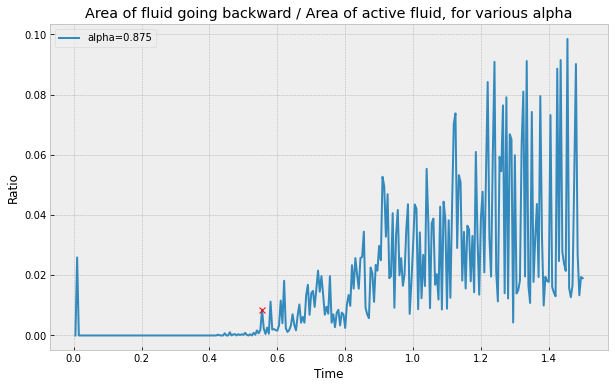

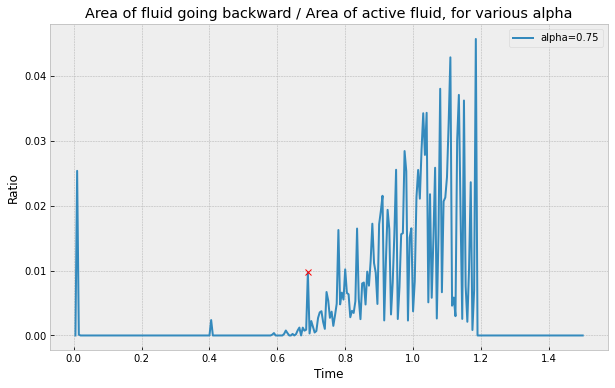

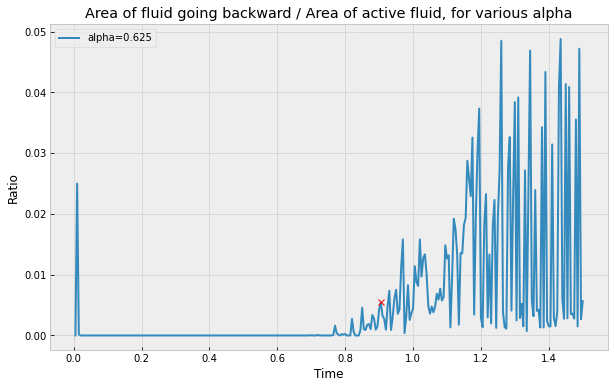

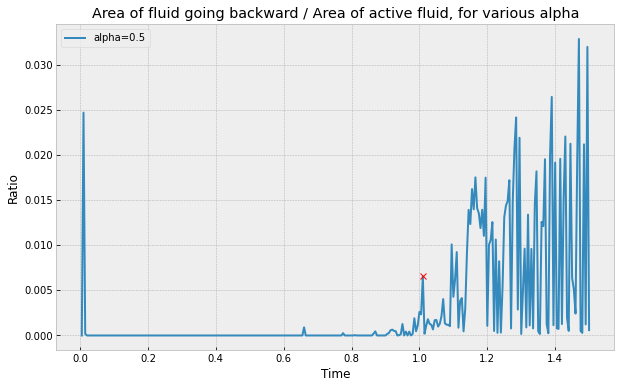

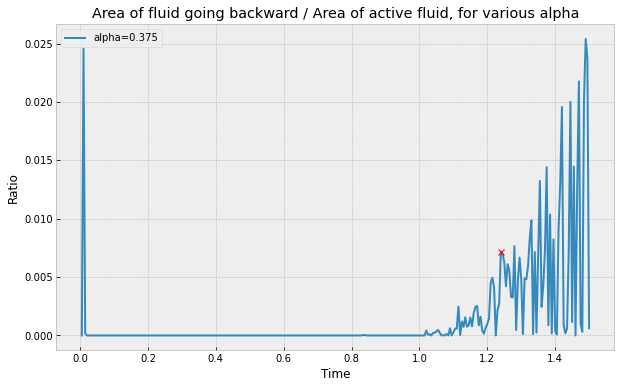

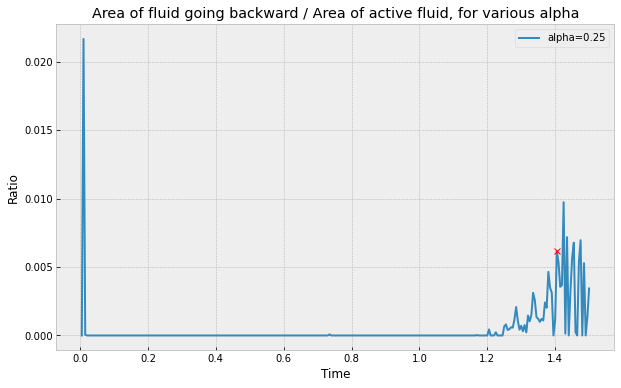

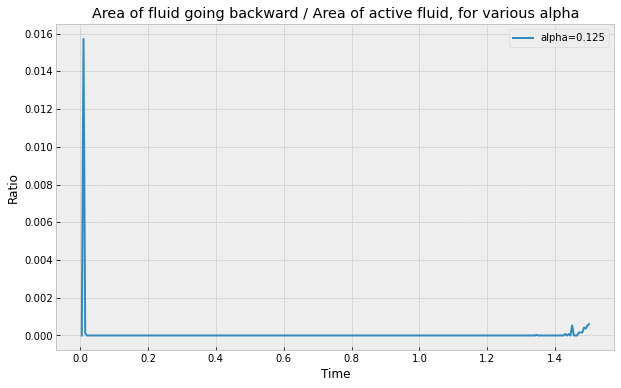

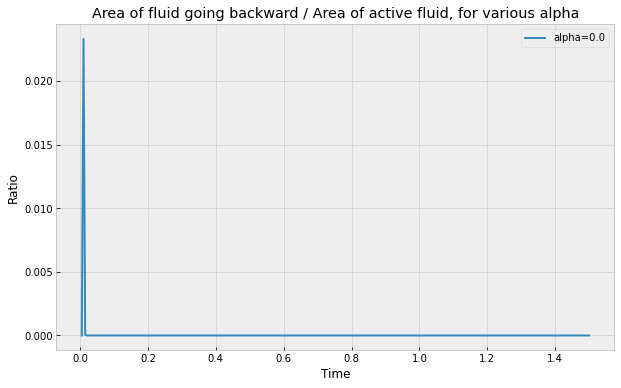

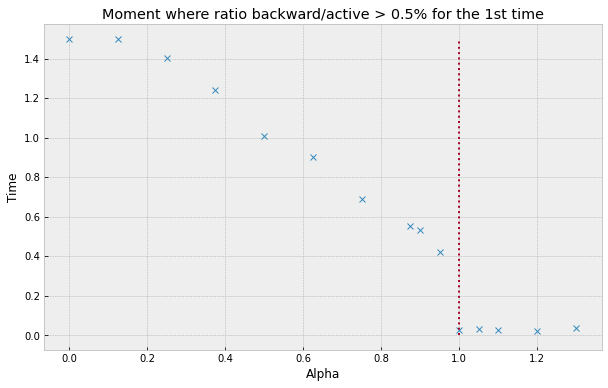

In [8]:
list_test=['3-6-2020#2', '26-5-2020#1', '3-6-2020#1','10-6-2020#13',  '10-6-2020#14','10-6-2020#12','10-6-2020#11','13-5-2020#4','12-5-2020#4', '13-5-2020#3', '12-5-2020#3','13-5-2020#2', '12-5-2020#2', '13-5-2020#1', '6-5-2020#10' ]

# fig, ax = plt.subplots(figsize=(10,6))
# for folder_name in list_test:
#     file_name_norm = "Figures/" + folder_name + "/norms.csv"
#     h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
#     T = np.linspace(dt,n*dt, n)
#     norms = mean_norm_with_time(file_name_norm, n=n, dt=dt) 
#     plt.plot(T, norms[:,0], label='alpha=' + str(alpha))
# 
# plt.xlabel('Time')
# plt.ylabel('Mean norm (log scale)')
# plt.title('Mean norm of the active fluid with time for various alpha')
# plt.yscale('log')
# plt.style.use('bmh')
# plt.legend()
# plt.show()
# plt.close(fig)

# fig, ax = plt.subplots(figsize=(10,6))
# for folder_name in list_test:
#     file_name_norm = "Figures/" + folder_name + "/norms.csv"
#     h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
#     T = np.linspace(dt,n*dt, n)
#     norms = mean_norm_with_time(file_name_norm, n=n, dt=dt)
#     plt.plot(T, norms[:,1], label='alpha=' + str(alpha))
# 
# plt.xlabel('Time')
# plt.ylabel('Variance of the norm (log scale)')
# plt.title('Variance of the norm of the active fluid with time for various alpha')
# plt.yscale('log')
# plt.style.use('bmh')
# plt.legend()
# plt.show()
# plt.close(fig)

start_time=[]
alphas=[]



for folder_name in list_test:
    file_name_ratio = "Figures/" + folder_name + "/size_backward.csv"
    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
    T = np.linspace(dt,n*dt, n)
    ratio, peaks = area_backward_with_time(file_name=file_name_ratio, n=n, dt=dt)
    alphas.append(alpha)
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(T, ratio, label='alpha=' + str(alpha))
    if peaks.shape[0]>0:
        plt.plot(T[peaks[0]], ratio[peaks[0]], 'x', color='r')
        start_time.append(T[peaks[0]])
    else:
        start_time.append(np.max(T))

    plt.xlabel('Time')
    plt.ylabel('Ratio')
    #plt.ylim(-0.005, 0.03)
    plt.title('Area of fluid going backward / Area of active fluid, for various alpha')
    plt.style.use('bmh')
    plt.legend()
    plt.show()
    plt.close(fig)
    


fig, ax = plt.subplots(figsize=(10,6))
plt.plot(alphas, start_time, 'x')
plt.plot(np.ones(100), np.linspace(0,1.5,100), ls=':')
plt.xlabel('Alpha')
plt.ylabel('Time')
plt.title('Moment where ratio backward/active > 0.5% for the 1st time')
plt.style.use('bmh')
plt.show()
plt.close(fig)   
        

#fig, ax = plt.subplots(figsize=(10,6))
#for folder_name in list_test:
#    file_name_dist = "Figures/" + folder_name + "/norms.csv"
#    h, dim_x, dim_y, nx, ny, n, dt, theta, Cahn, Pe, Ca, starting_point, h_0, k_wave, sigma, q, alpha = retrieve_param(folder_name)
#    T = np.linspace(dt,n*dt, n)
#    norms=distrib_norm(file_name=file_name_dist, n=n, dt=dt)
#    plt.hist(norms, label='alpha=' + str(alpha), bins=100, alpha=0.5, range=[0,6])
#
#plt.xlabel('Norm of the velocity')
#plt.ylabel('Count')
#plt.title('Distribution of the norm of the velocity in the active fluid, for various alpha')
#plt.style.use('bmh')
#plt.legend()
#plt.show()
#plt.close(fig)

In [9]:
1/(0)

ZeroDivisionError: division by zero

In [10]:
0**(-1)

ZeroDivisionError: 0.0 cannot be raised to a negative power